In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import pandas as pd
from theano import shared
import seaborn as sns

ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


In [2]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

plt.rcParams['figure.figsize'] = [5.0, 4.0]
plt.rcParams["font.size"] = 14
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams['axes.facecolor'] = 'white'

In [3]:
N = 100
height = np.random.normal(10,2,N)
leg_prop = np.random.uniform(0.4, 0.5, N)
leg_left = leg_prop*height + np.random.normal(0, 0.02, N)
leg_right = leg_prop*height + np.random.normal(0, 0.02, N)

d = pd.DataFrame(np.vstack([height, leg_left, leg_right]).T, columns=["height", "leg_left", "leg_right"])

In [19]:
with pm.Model() as m6_1:
    
    a = pm.Normal("a", 10, 100)
    br = pm.Normal("br", 2, 10)
    bl = pm.Normal("bl", 2, 10)
    
    mu = a + bl*d.leg_left + br*d.leg_right
    
    sigma = pm.Exponential("sigma", 1)
    height = pm.Normal("height", mu, sigma, observed=d.height)
    
    trace6_1 = pm.sample()

<ipython-input-19-832cce5db9ef>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace6_1 = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bl, br, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 56 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
There were 40 divergences after tuning. Increase `target_accept` or reparameterize.


In [20]:
az.summary(trace6_1)

/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.160,0.307,0.583,1.741,0.007,0.005,2121.0,1778.0,1.0
br,1.790,2.157,-2.342,5.858,0.058,0.043,1388.0,1495.0,1.0
bl,0.174,2.168,-3.975,4.267,0.058,0.042,1386.0,1475.0,1.0
sigma,0.638,0.044,0.568,0.724,0.001,0.001,1360.0,726.0,1.0


/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/utils.py:124: UserWarning: Items starting with ~: ['mu'] have not been found and will be ignored
  warnings.warn(


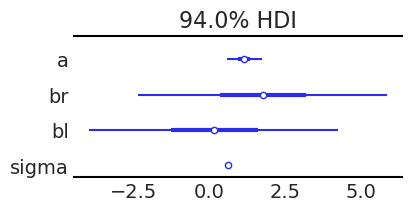

In [26]:
az.plot_forest(trace6_1, var_names=["~mu"], combined=True, figsize=[4,2]);

Text(0.5, 1.0, 'Sum of br and bl terms')

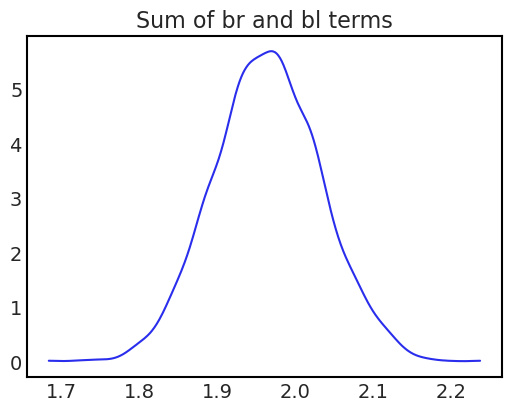

In [31]:
az.plot_kde(trace6_1.br+trace6_1.bl);
plt.title("Sum of br and bl terms")

In [33]:
d = pd.read_csv("data/milk.csv", sep=";")

def zs(data):
    return (data - data.mean()) / data.std()

d.loc[:, "K"] = zs(d["kcal.per.g"])
d.loc[:, "F"] = zs(d["perc.fat"])
d.loc[:, "L"] = zs(d["perc.lactose"])

d.head()

,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc,K,F,L
0,Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16,-0.940041,-1.217243,1.307262
1,Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NaN,-0.816126,-1.030355,1.011285
2,Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NaN,-1.125913,-1.391531,1.382679
3,Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NaN,-1.001998,-1.335535,1.586874
4,Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NaN,-0.258511,-0.469693,0.257115


In [36]:
# code 6.9
with pm.Model() as m6_2:
    a = pm.Normal("a", 0, 0.2)
    bF = pm.Normal("bF",0, 0.5)
    mu = a + bF*d.F
    
    sigma = pm.Exponential("sigma", 1)
    
    K = pm.Normal("K", mu, sigma, observed=d.K)
    
    trace6_2 = pm.sample()
    
with pm.Model() as m6_3:
    a = pm.Normal("a", 0, 0.2)
    bL = pm.Normal("bL",0, 0.5)
    mu = a + bL*d.L
    
    sigma = pm.Exponential("sigma", 1)
    
    K = pm.Normal("K", mu, sigma, observed=d.K)
    
    trace6_3 = pm.sample(return_inferencedata=False)

<ipython-input-36-e28a13659c00>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace6_2 = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bF, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bL, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [43]:
az.summary(trace6_2)

/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.002,0.085,-0.151,0.166,0.001,0.001,4147.0,2913.0,1.0
bF,0.861,0.095,0.693,1.050,0.001,0.001,4363.0,2092.0,1.0
sigma,0.489,0.071,0.362,0.617,0.001,0.001,4258.0,2714.0,1.0


In [39]:
az.summary(trace6_3)

/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-0.001,0.072,-0.132,0.140,0.001,0.001,4540.0,3161.0,1.0
bL,-0.900,0.078,-1.056,-0.758,0.001,0.001,4011.0,2555.0,1.0
sigma,0.413,0.062,0.300,0.519,0.001,0.001,3816.0,2242.0,1.0


In [45]:
# code 6.10
with pm.Model() as m6_4:
    a = pm.Normal("a", 0, 0.2)
    bL = pm.Normal("bL",0, 0.5)
    bF = pm.Normal("bF",0, 0.5)

    mu = a + bL*d.L + bF*d.F
    
    sigma = pm.Exponential("sigma", 1)
    
    K = pm.Normal("K", mu, sigma, observed=d.K)
    
    trace6_4 = pm.sample(return_inferencedata=False)

az.summary(trace6_4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bF, bL, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-0.000,0.075,-0.145,0.138,0.002,0.001,2518.0,1991.0,1.0
bL,-0.660,0.199,-1.031,-0.291,0.005,0.003,1656.0,1629.0,1.0
bF,0.259,0.197,-0.112,0.630,0.005,0.004,1565.0,1601.0,1.0
sigma,0.415,0.059,0.318,0.531,0.001,0.001,2087.0,1685.0,1.0


/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.tight_layout(*args, **kwargs)


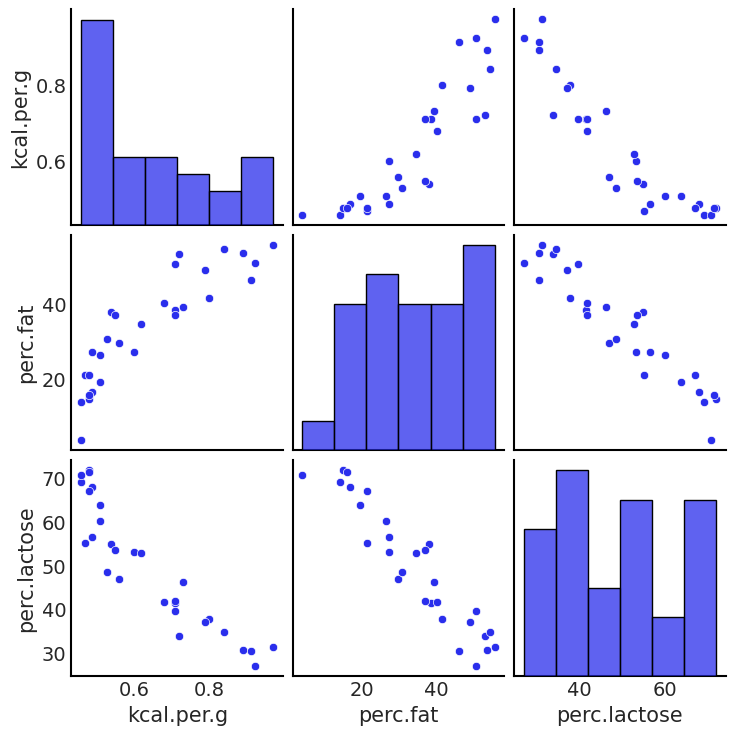

In [49]:
sns.pairplot(d.loc[:, ["kcal.per.g", "perc.fat", "perc.lactose"]]);

# Multicolinearity: These variables are so (negatively) correlated, that that one almost makes the other reduntant. 
# Once you know one of two, knowing the either doesn't help much in predicting kcal.per.g

In [59]:
# code 6.13
N = 100
h0 = np.random.normal(10, 2, N)
treatment = np.repeat([0,1], N/2)
fungus = np.random.binomial(n=1, p=0.5-treatment*0.4, size=N)
h1 = h0 + np.random.normal(5-3*fungus,1,size=N)

d = pd.DataFrame(np.vstack([h0, h1, treatment, fungus]).T, columns=["h0", "h1", "treatment", "fungus"])

In [63]:
az.summary(d.to_dict(orient="list"))

arviz - WARNING - Shape validation failed: input_shape: (1, 100), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
h0,9.912,1.905,6.818,13.625,0.270,0.192,51.0,117.0,NaN
h1,14.401,2.441,10.155,18.416,0.485,0.373,25.0,82.0,NaN
treatment,0.500,0.503,0.000,1.000,0.482,0.546,1.0,1.0,NaN
fungus,0.280,0.451,0.000,1.000,0.059,0.042,59.0,59.0,NaN


In [68]:
# code 6.15
with pm.Model() as m6_5:
    p = pm.Lognormal("p", 0, 0.25)
    
    sigma = pm.Exponential("sigma", 1)
    mu = p*d.h0
    h1 = pm.Normal("h1", mu, sigma, observed=d.h1)
    
    trace6_5 = pm.sample()

az.summary(trace6_5)

<ipython-input-68-00bbeb3756c1>:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace6_5 = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,1.432,0.019,1.396,1.469,0.000,0.000,3529.0,2676.0,1.0
sigma,1.920,0.136,1.651,2.162,0.002,0.002,3320.0,2452.0,1.0


In [70]:
# code 6.16

with pm.Model() as m6_6:
    a = pm.Lognormal("a", 0, 0.2)
    bt = pm.Normal("bt", 0, 0.5)
    bf = pm.Normal("bf", 0, 0.5)
    
    p = a + bt*d.treatment + bf*d.fungus
    mu = h0*p
    sigma = pm.Exponential("sigma", 1)
    
    h1 = pm.Normal("h1", mu, sigma, observed=d.h1)
    
    trace6_6 = pm.sample()

<ipython-input-70-8246c80a025a>:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace6_6 = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bf, bt, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [71]:
az.summary(trace6_6)
# We're interested in whether treatment has an effect on growth. Here we ask, does the treatment matter
# when we already know whether a plant developed fungus? The answer is no, because the effect of the treatment 
# is already baked into the effect of fungus.

/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bt,0.002,0.028,-0.050,0.053,0.001,0.000,2472.0,2223.0,1.0
bf,-0.301,0.030,-0.353,-0.241,0.001,0.000,2510.0,2626.0,1.0
a,1.520,0.023,1.478,1.565,0.000,0.000,2181.0,2045.0,1.0
sigma,1.324,0.096,1.151,1.503,0.002,0.001,2425.0,2551.0,1.0


In [72]:
# code 6.17
# drop 'post-treatment' effect of fungus

with pm.Model() as m6_7:
    a = pm.Lognormal("a", 0, 0.2)
    bt = pm.Normal("bt", 0, 0.5)
    
    p = a + bt*d.treatment
    mu = h0*p
    sigma = pm.Exponential("sigma", 1)
    
    h1 = pm.Normal("h1", mu, sigma, observed=d.h1)
    
    trace6_7 = pm.sample()

<ipython-input-72-7f5ee067e692>:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace6_7 = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bt, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [75]:
az.summary(trace6_7)

/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bt,0.066,0.038,-0.005,0.138,0.001,0.001,2116.0,2175.0,1.0
a,1.397,0.027,1.349,1.450,0.001,0.000,1997.0,2353.0,1.0
sigma,1.899,0.135,1.654,2.151,0.003,0.002,2920.0,2655.0,1.0


From the book:
Now the impact of treatment is clearly positive, as it should be. It makes sense to control
for pre-treatment differences, like the initial height h0, that might mask the causal influence
of treatment. But including post-treatment variables can actually mask the treatment itself.
This doesn’t mean you don’t want the model that includes both treatment and fungus. The
fact that including fungus zeros the coefficient for treatment suggests that the treatment
works for exactly the anticipated reasons. It tells us about mechanism. But a correct inference
about the treatment still depends upon omitting the post-treatment variable.

By including F, we end up blocking the path from the treatment to the outcome
D-seperation: (Directional-seperation) Meaning that some variables on the graph are independent of others, i.e. there is no path connecting them. H1 is d-seperated from T, but only when we condition on F.
H1 ⊥⊥ T|F happens because once we know F, learning T provides no additional information about H1.


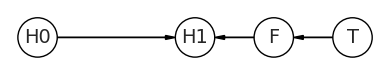

In [83]:
import daft

from causalgraphicalmodels import CausalGraphicalModel

plant_dag = CausalGraphicalModel(
    nodes=["H0", "H1", "F", "T"], edges=[("H0", "H1"), ("F", "H1"), ("T", "F")]
)
pgm = daft.PGM()
coordinates = {"H0": (0, 0), "T": (4, 0), "F": (3, 0), "H1": (2, 0)}
for node in plant_dag.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in plant_dag.dag.edges:
    pgm.add_edge(*edge)
pgm.render()
plt.gca().invert_yaxis()

print("By including F, we end up blocking the path from the treatment to the outcome")
print("D-seperation: (Directional-seperation) Meaning that some variables on the graph are independent of others, i.e. there is no path connecting them. H1 is d-seperated from T, but only when we condition on F.")
print("H1 ⊥⊥ T|F happens because once we know F, learning T provides no additional information about H1.")

In [84]:
# from https://github.com/pymc-devs/pymc-resources/blob/main/Rethinking_2/Chp_06.ipynb
all_independencies = plant_dag.get_all_independence_relationships()
for s in all_independencies:
    if all(
        t[0] != s[0] or t[1] != s[1] or not t[2].issubset(s[2])
        for t in all_independencies
        if t != s
    ):
        print(s)

('T', 'H0', set())
('T', 'H1', {'F'})
('H0', 'F', set())


In [ ]:
# Recap:
# 1. Multicolinearity
# 2. Post-treatment bias
# Now:
# 3. Colider bias
# T -> S <- N
# Recall selection for funding (S), trustworthiness (T), and newsworthiness (N). 
# If you learn that a proposal has been selected (S), then learning its T also provides info about N.
# Why? If a selected proposal has low T, then it must have high N, otherwise it wouldn't have been funded.
# This leads to the negative association between T and N in the population of selected proposals.

In [4]:
# Show how controlling for a plausible confound of happiness can bias inference about the influence of age.
# Happiness -> Marriage <- Age
# Consider a MR model aimed at inferring the influence of age on happiness, while controlling for marriage status.
# \mu_i = \alpha_{MID,[i] + \beta_A A_i}

# Include sim from pymc-devs
def inv_logit(x):
    return np.exp(x) / (1 + np.exp(x))


def sim_happiness(N_years=100, seed=1234):
    np.random.seed(seed)

    popn = pd.DataFrame(np.zeros((20 * 65, 3)), columns=["age", "happiness", "married"])
    popn.loc[:, "age"] = np.repeat(np.arange(65), 20)
    popn.loc[:, "happiness"] = np.repeat(np.linspace(-2, 2, 20), 65)
    popn.loc[:, "married"] = np.array(popn.loc[:, "married"].values, dtype="bool")

    for i in range(N_years):
        # age population
        popn.loc[:, "age"] += 1
        # replace old folk with new folk
        ind = popn.age == 65
        popn.loc[ind, "age"] = 0
        popn.loc[ind, "married"] = False
        popn.loc[ind, "happiness"] = np.linspace(-2, 2, 20)

        # do the work
        elligible = (popn.married == 0) & (popn.age >= 18)
        marry = np.random.binomial(1, inv_logit(popn.loc[elligible, "happiness"] - 4)) == 1
        popn.loc[elligible, "married"] = marry

    popn.sort_values("age", inplace=True, ignore_index=True)

    return popn

In [41]:
d = sim_happiness()
adults = d.loc[d.age > 17]
adults.loc[:, "A"] = (adults["age"].copy() - 18) / (65 - 18) # (y - min) / (max - min)
mid = pd.Categorical(adults.loc[:, "married"].astype(int))

In [43]:
mid

[1, 0, 0, 0, 0, ..., 0, 0, 0, 0, 1]
Length: 940
Categories (2, int64): [0, 1]

In [45]:
with pm.Model() as m6_8:
    
    bA = pm.Normal("bA", 0, 2)
    a = pm.Normal("a", 0, 1, shape=2)
    
    mu = a[mid] + bA*adults.A.values
    sigma = pm.Exponential("sigma", 1)
    
    happiness = pm.Normal("happiness", mu, sigma, observed=adults.happiness.values)
    
    
    trace6_8 = pm.sample()

<ipython-input-45-831e6e70dc6b>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace6_8 = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, a, bA]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [46]:
az.summary(trace6_8)

/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bA,-0.718,0.122,-0.935,-0.483,0.003,0.002,1846.0,1780.0,1.0
a[0],-0.200,0.068,-0.316,-0.065,0.002,0.001,1930.0,1919.0,1.0
a[1],1.216,0.091,1.044,1.385,0.002,0.001,1972.0,1867.0,1.0
sigma,1.022,0.024,0.980,1.068,0.000,0.000,2602.0,2529.0,1.0


In [47]:
# code 6.24
# now we dont model marriage status
with pm.Model() as m6_9:
    
    bA = pm.Normal("bA", 0, 2)
    a = pm.Normal("a", 0, 1)
    
    mu = a + bA*adults.A.values
    sigma = pm.Exponential("sigma", 1)
    
    happiness = pm.Normal("happiness", mu, sigma, observed=adults.happiness.values)
    
    
    trace6_9 = pm.sample()
    
az.summary(trace6_9)

<ipython-input-47-ca0ed0f13d75>:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace6_9 = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, a, bA]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.888174864445954, but should be close to 0.8. Try to increase the number of tuning steps.
/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bA,0.003,0.139,-0.251,0.262,0.003,0.003,2092.0,1670.0,1.00
a,-0.001,0.078,-0.149,0.138,0.002,0.002,2078.0,1549.0,1.00
sigma,1.216,0.029,1.164,1.269,0.001,0.000,2238.0,1931.0,1.01


In [3]:
# code 6.25 - 6.28
# Features an additional simulation of collider bias:
# G .. P # with G>P, G>C U>P, U>C
#  .   .
#   .  .  U
#     .C
# Grantparent education influences both Parent education and Children education.
# an Unmeasured, common influence on Parents and Children, such as neighborhoods, not shared by Grandparents.
# If we condition on P, inference will be biased about G->C even if we never get to measure U.
# Collider bias: negative associate of C on G even if this doesn't exist in the simulation. Why?
# Once we know P, learning G invisibly tells us about U, and U is associated with C.
# Consdier two different parents with the same education level. One has a highly educated grandparent, the other
# a poorly educated grandparent. The only probable way for the parents to have the same education is if they live
# in different neighborhoods.

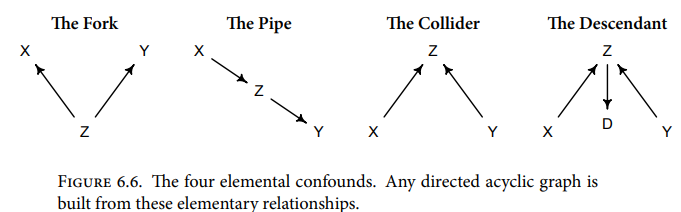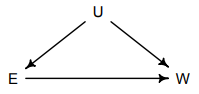